In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [187]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


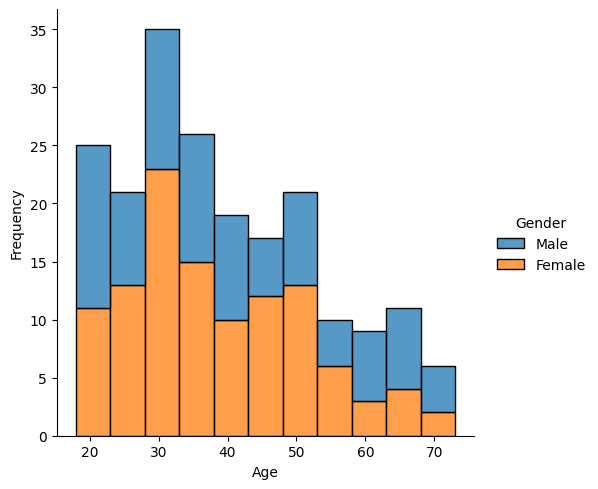

In [188]:
sns.displot(data=df, x="Age", hue="Gender", binwidth = 5, multiple = "stack");

plt.xlabel("Age")
plt.ylabel("Frequency")
#plt.xlim(18, 70)
plt.show()

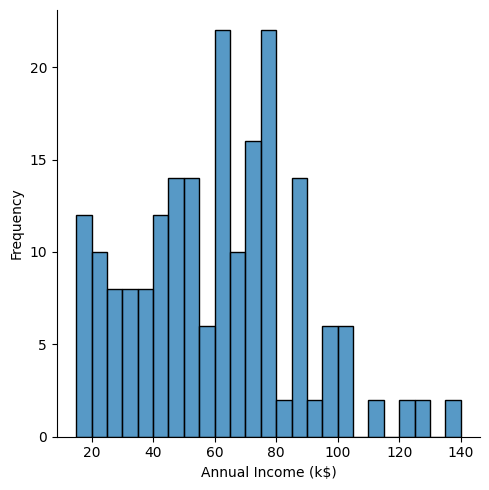

In [189]:
sns.displot(data=df, x="Annual Income (k$)", binwidth = 5);

plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

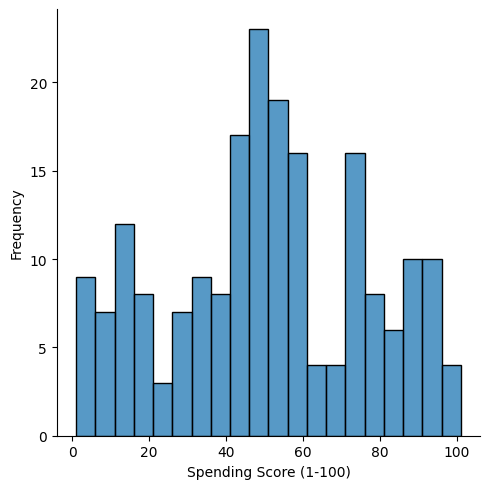

In [190]:
sns.displot(data=df, x="Spending Score (1-100)", binwidth = 5);

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

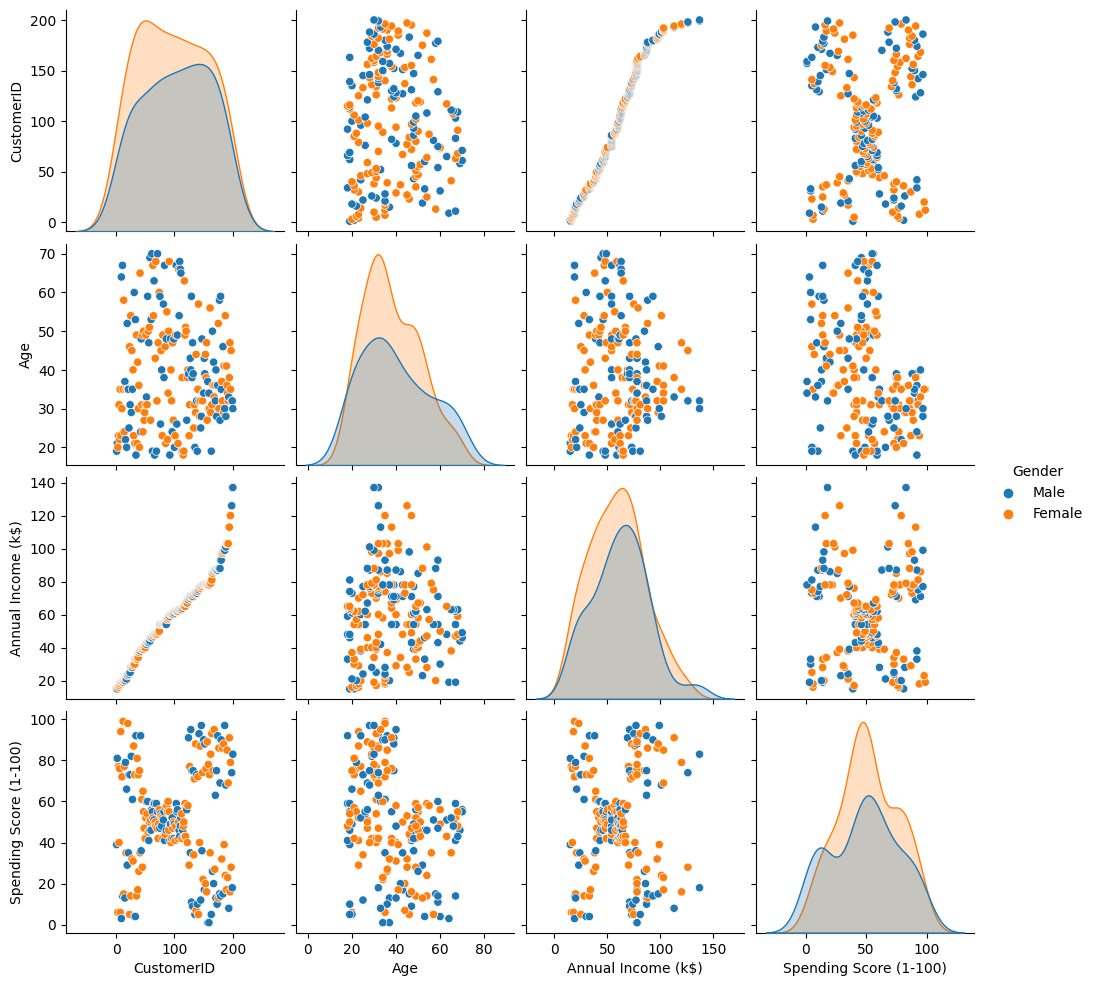

In [191]:
sns.pairplot(df, hue ='Gender')
plt.show()

In [192]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [193]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [194]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

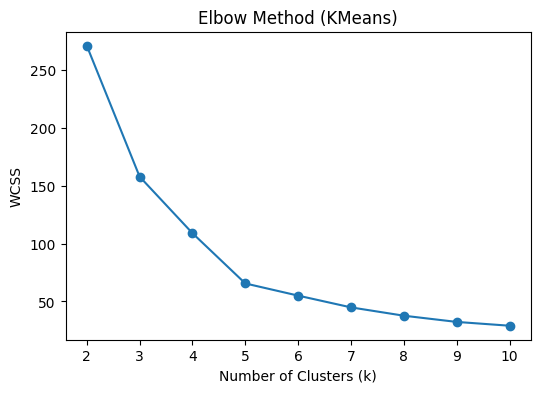

In [195]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method (KMeans)")
plt.show()

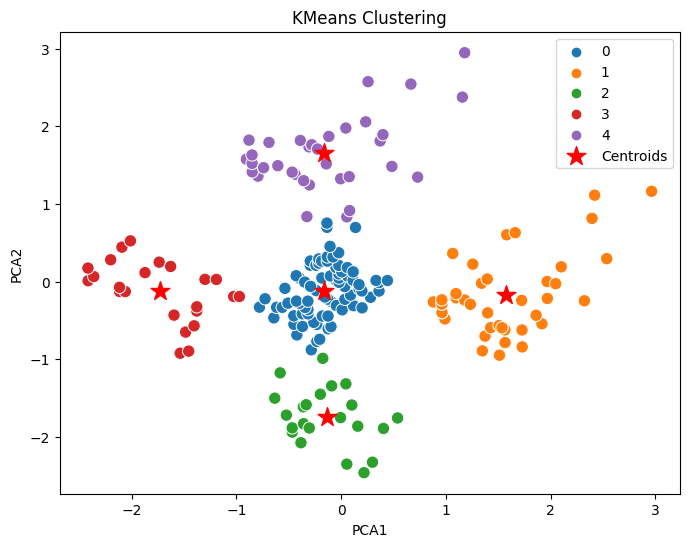

In [203]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=pca_df, palette="tab10", s=80)
plt.scatter(pca_df.groupby('Cluster').mean()['PCA1'], 
            pca_df.groupby('Cluster').mean()['PCA2'], 
            color="red", marker="*", s=200, label="Centroids")
plt.title("KMeans Clustering")
plt.legend()
plt.show()

In [204]:
#evaluate clustering
print('inertia: %.3f' % kmeans.inertia_)

# Calculate Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

inertia: 65.568
Silhouette Score: 0.554


In [210]:
db = DBSCAN(eps=0.36, min_samples=4).fit(X_scaled)

db.labels_
sc = silhouette_score(X_scaled, db.labels_)
print("Silhouette Coefficient:%0.2f"%sc)

Silhouette Coefficient:0.43


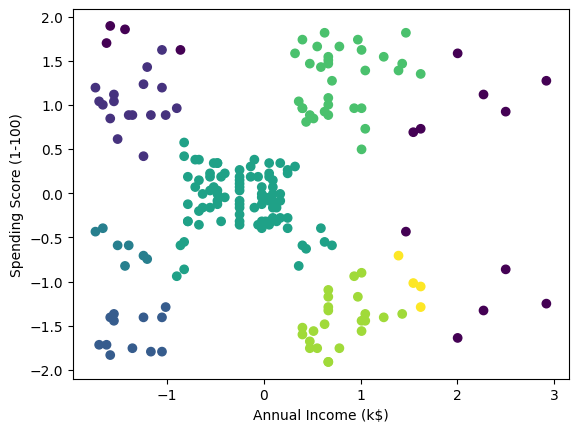

In [211]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= db.labels_, cmap = 'viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [212]:
sc = silhouette_score(X_scaled, db.labels_)
print("Silhouette Coefficient: %0.2f"%sc)

labels = db.labels_
  
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  
print(f"DBSCAN Number of clusters is : {n_clusters_}")

Silhouette Coefficient: 0.43
DBSCAN Number of clusters is : 7


Text(0.5, 0, 'Cluster')

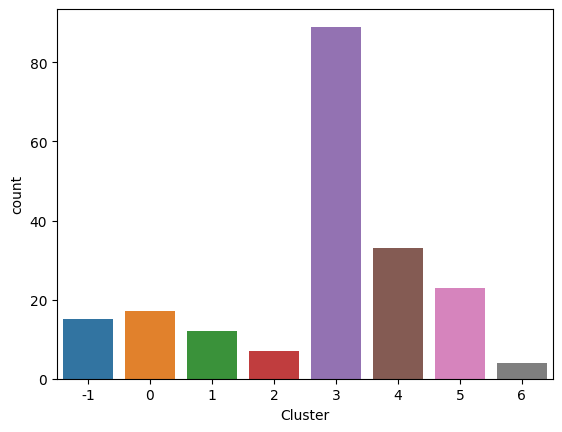

In [213]:
sns.countplot(x=db.labels_)
plt.xlabel("Cluster")